In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="white")

In [3]:
output_file = 'results/OzoneCrossVal/results_pollution_0523_crossval'

total_metrics = pd.read_csv(f'{output_file}.csv')

total_metrics["n_features"] = total_metrics.selected_features.apply(eval).apply(len)

In [4]:
total_metrics['model_name'] = total_metrics['model_name'].replace({'decisiontree': 'DT', 'lstm': "LSTM"})
total_metrics['selection_name'] = total_metrics['selection_name'].replace({'NoSelection': 'NS', 'TimeSelectionLayer': 'TSL'})

total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.model_name=='LSTM') & (total_metrics.selection_params_residual==False), 'model_name'] = 'TLSTM'
total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.model_name=='dense') & (total_metrics.selection_params_residual==False), 'model_name'] = 'TFF'
total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.model_name=='LSTM') & (total_metrics.selection_params_residual==True), 'model_name'] = 'TLSTMRes'
total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.model_name=='dense') & (total_metrics.selection_params_residual==True), 'model_name'] = 'TFFRes'
total_metrics.loc[total_metrics.selection_name=='TimeSelectionLayerConstant', 'model_name'] = 'TSL*'
#total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.selection_params_residual), 'model_name'] = 'TSLRes'
total_metrics['model_name'] = total_metrics['model_name'].replace({'dense': 'FF', 'lasso': 'L1'})
total_metrics['dataset'] = total_metrics['dataset'].apply(lambda x: x.capitalize()).replace({'Rondadelvalle': 'Ronda del valle'})
total_metrics.drop("dataset_name", inplace=True, axis=1)

In [5]:
best_models = total_metrics.loc[total_metrics.groupby(['dataset','dataset_params_test_year', 'model_name'], dropna=False).root_mean_squared_error_valid.idxmin()]
best_models[best_models.dataset_params_test_year>2005].pivot(index = ['dataset_params_test_year'], columns=['dataset', 'model_name'], values=['root_mean_squared_error', 'n_features']).round(1)#.to_excel("results/ResSelNet/results_pollution_0523_crossval.xlsx")

root_mean_squared_error                          \
dataset                             Aljarafe0523                           
model_name                                    DT    FF    L1  LSTM   TFF   
dataset_params_test_year                                                   
2006                                        17.1  17.6  16.8  16.3  17.1   
2007                                        16.4  17.1  15.5  15.9  16.4   
2008                                        17.7  17.2  16.7  16.5  17.7   
2009                                        17.3  17.1  16.6  16.5  16.9   
2010                                        17.7  17.2  16.9  16.6  16.6   
2011                                        15.7  16.3  15.0  15.2  16.0   
2012                                        17.2  17.2  16.5  16.6  16.7   
2013                                        16.0  15.1  14.9  14.6  14.4   
2014                                        15.7  15.8  15.0  14.7  15.0   
2015                                        16.4  16.9  17.2  16.0  16.1   
2016                                        15.1  15.3  15.1  14.5  15.1   
2017                                        15.5  15.8  15.2  15.1  15.1   
2018                                        14.5  14.3  14.1  14.2  14.3   
2019                                        15.5  14.7  13.7  14.2  13.8   
2020                                        13.8  13.3  13.1  12.9  13.0   
2021                                        14.0  13.1  12.9  12.8  12.9   
2022                                        14.9  13.7  13.6  13.7  13.7   
2023                                        15.8  15.8  15.2  15.0  15.2   

                                                                 ...  \
dataset                        Asomadilla0523                    ...   
model_name               TLSTM             DT    FF    L1  LSTM  ...   
dataset_params_test_year                                         ...   
2006                      16.2           17.9  19.2  17.4  17.5  ...   
2007                      15.6           17.2  17.5  16.4  16.2  ...   
2008                      16.9           17.1  17.5  16.6  16.5  ...   
2009                      16.7           16.3  16.6  16.2  15.6  ...   
2010                      16.1           16.7  16.8  16.3  16.3  ...   
2011                      14.8           16.4  17.5  15.8  16.5  ...   
2012                      16.0           16.3  16.1  15.8  15.7  ...   
2013                      14.2           15.5  15.4  14.6  14.3  ...   
2014                      14.4           16.0  15.6  15.6  15.3  ...   
2015                      16.0           15.8  15.6  14.9  15.2  ...   
2016                      14.4           15.2  15.2  14.7  15.1  ...   
2017                      14.5           16.2  15.7  14.8  15.2  ...   
2018                      13.9           16.6  14.7  15.2  15.3  ...   
2019                      14.0           15.6  15.2  15.1  14.9  ...   
2020                      12.8           14.1  13.6  13.6  13.1  ...   
2021                      13.1           14.7  14.0  14.1  14.1  ...   
2022                      13.3           14.1  13.6  13.0  12.7  ...   
2023                      14.6           14.9  13.9  13.6  13.3  ...   

                                n_features                                  \
dataset                  Rondadelvalle0523                      Torneo0523   
model_name                              L1   LSTM    TFF  TLSTM         DT   
dataset_params_test_year                                                     
2006                                  20.0  217.0   19.0  153.0       37.0   
2007                                  51.0  182.0   54.0  165.0        7.0   
2008                                 257.0  182.0   77.0  272.0       14.0   
2009                                  22.0  350.0   56.0  169.0        7.0   
2010                                  22.0  182.0   42.0  231.0       17.0   
2011                                  22.0  182.0   18.0  151.0  

<Figure size 1440x1440 with 0 Axes>

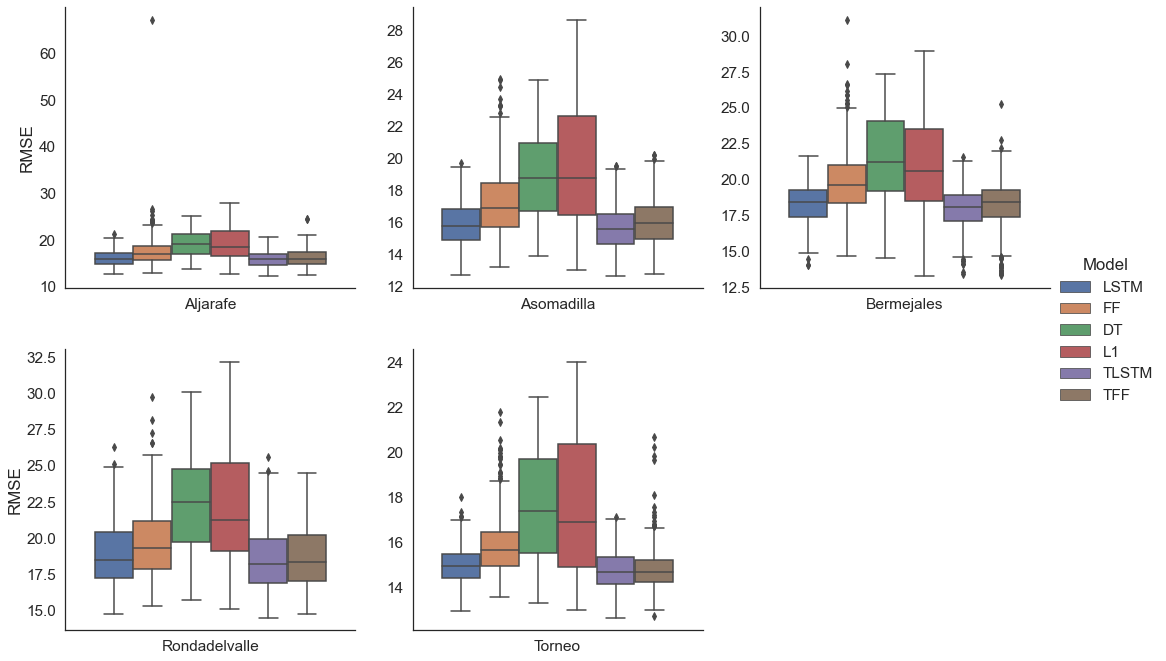

In [6]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))

total_metrics.dataset = total_metrics.dataset.str[:-4]

#total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)
total_metrics = total_metrics.rename({'model_name': 'Model', 'root_mean_squared_error': 'RMSE', 'n_features': '# Features'}, axis=1)
g = sns.catplot(data=total_metrics, kind='box', x='dataset', y="RMSE", col='dataset', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.show()

<Figure size 1440x1440 with 0 Axes>

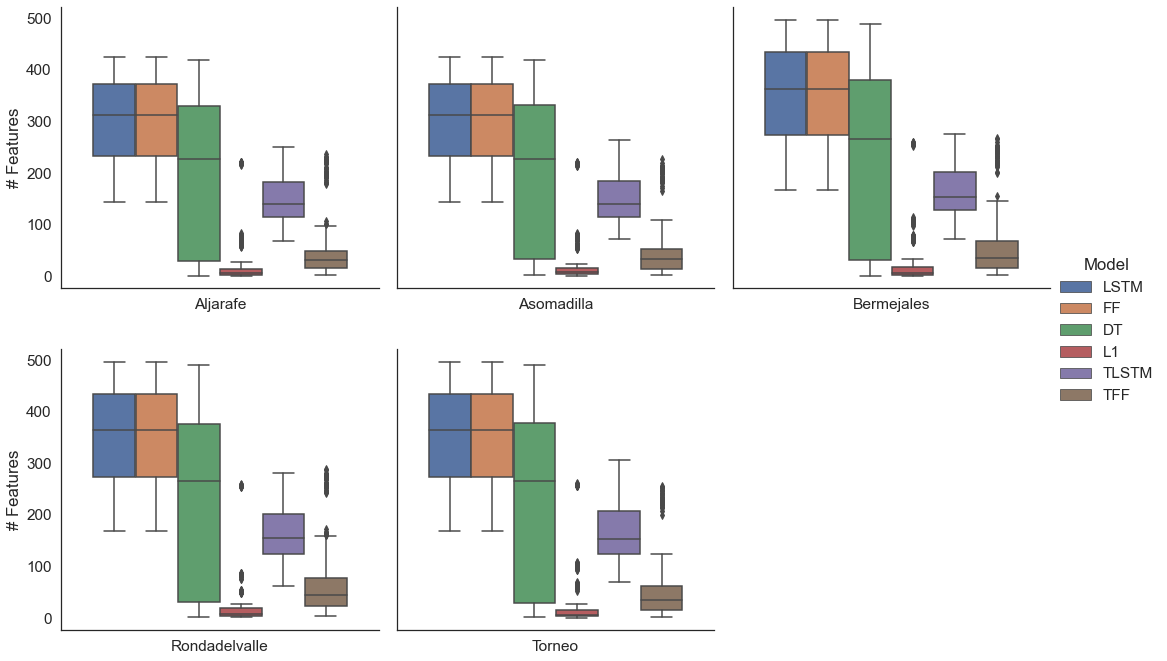

In [7]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)

g = sns.catplot(data=total_metrics[(total_metrics.dataset_params_test_year>2005)], kind='box', x='dataset', y="# Features", col='dataset', hue='Model', sharex=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.show()
plt.show()

## Selection masks

0.5333333333333333
0.49765258215962443
0.5435897435897435
0.568075117370892
0.5422535211267606


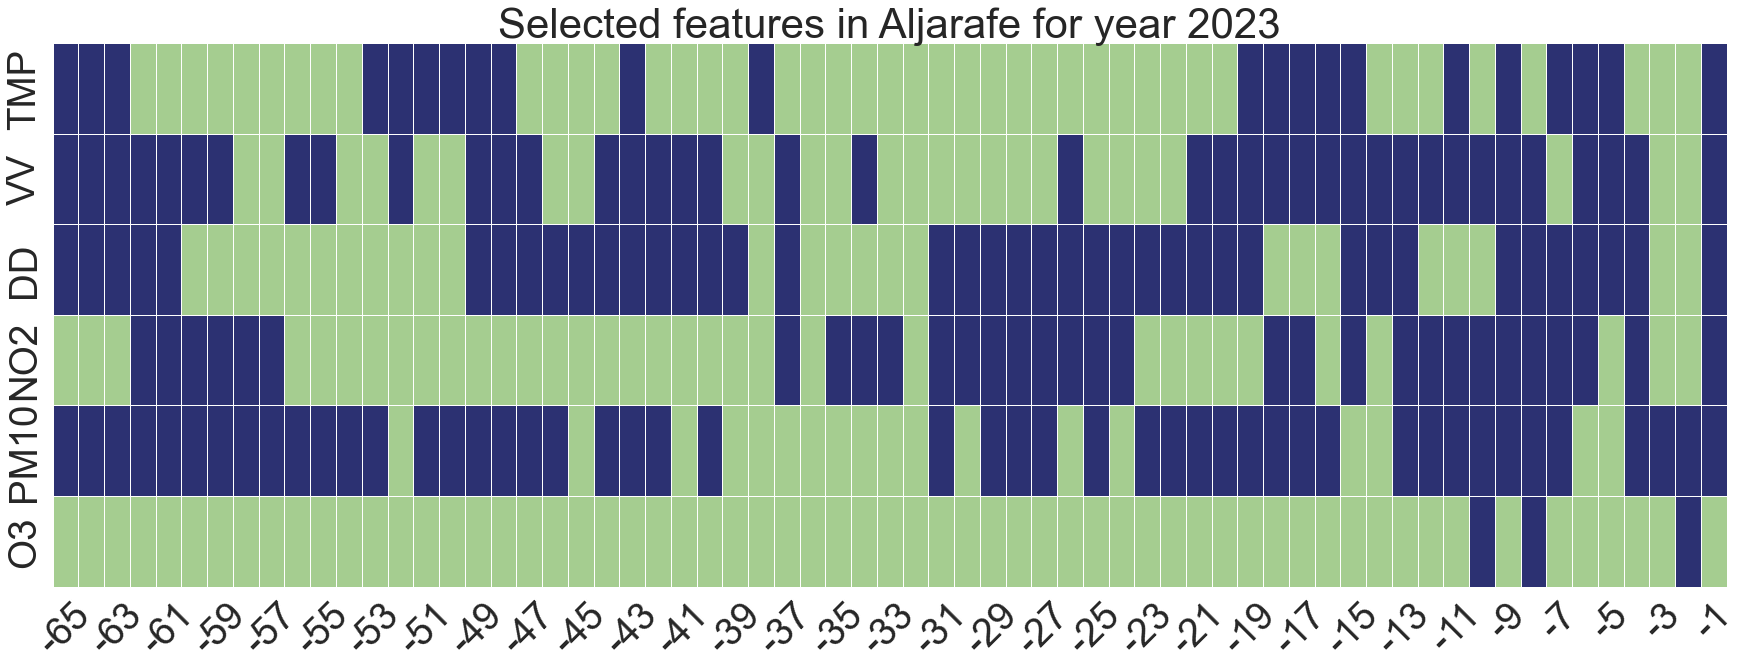

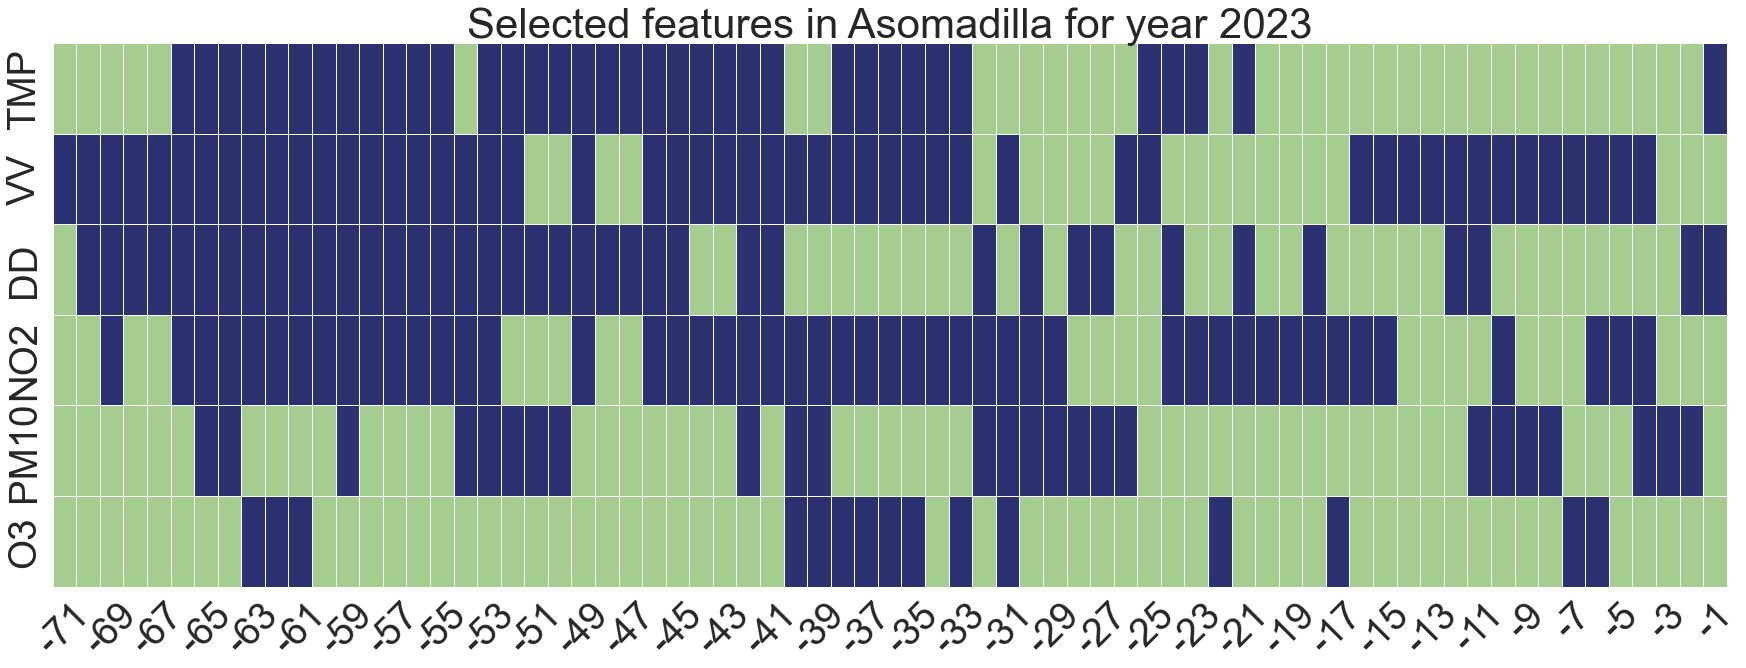

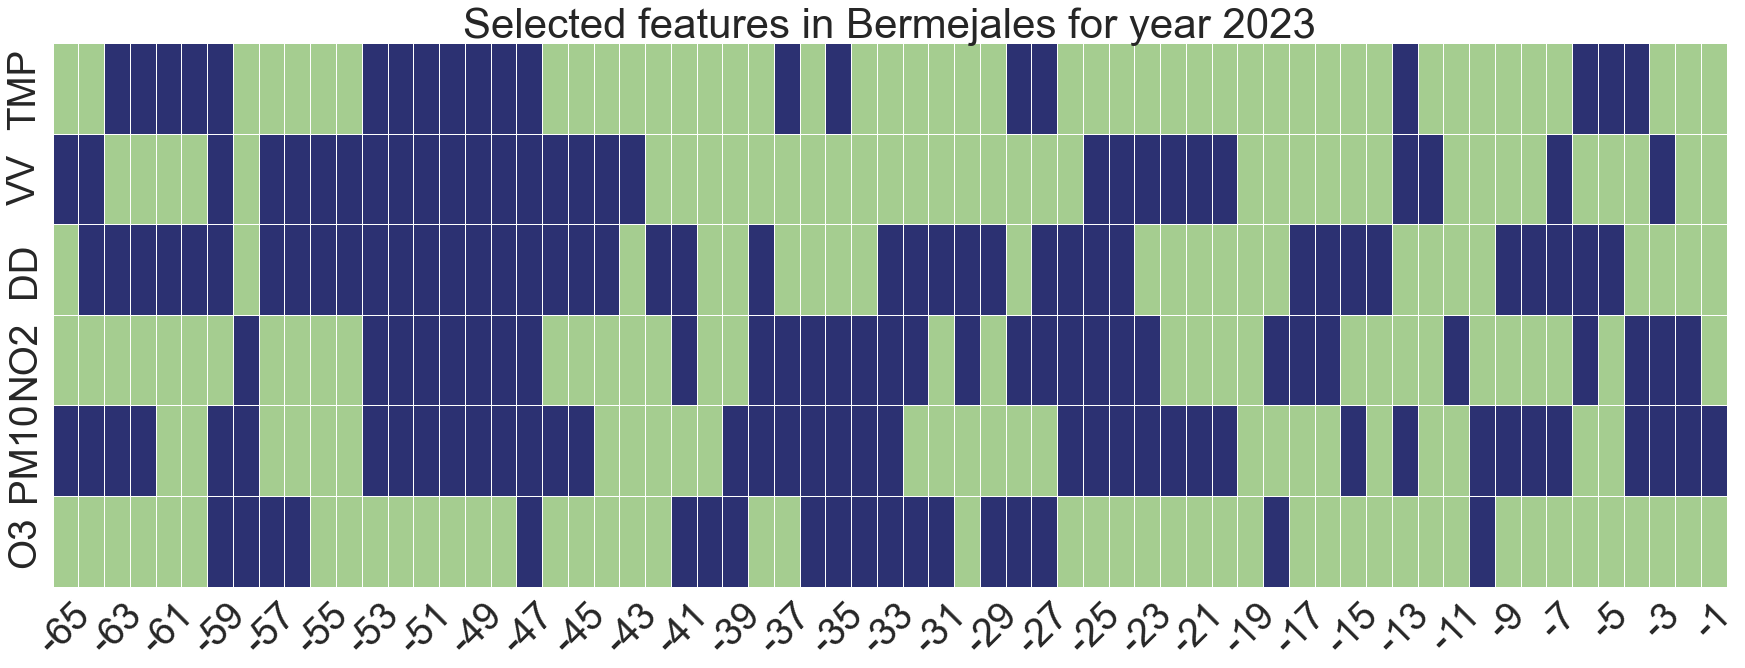

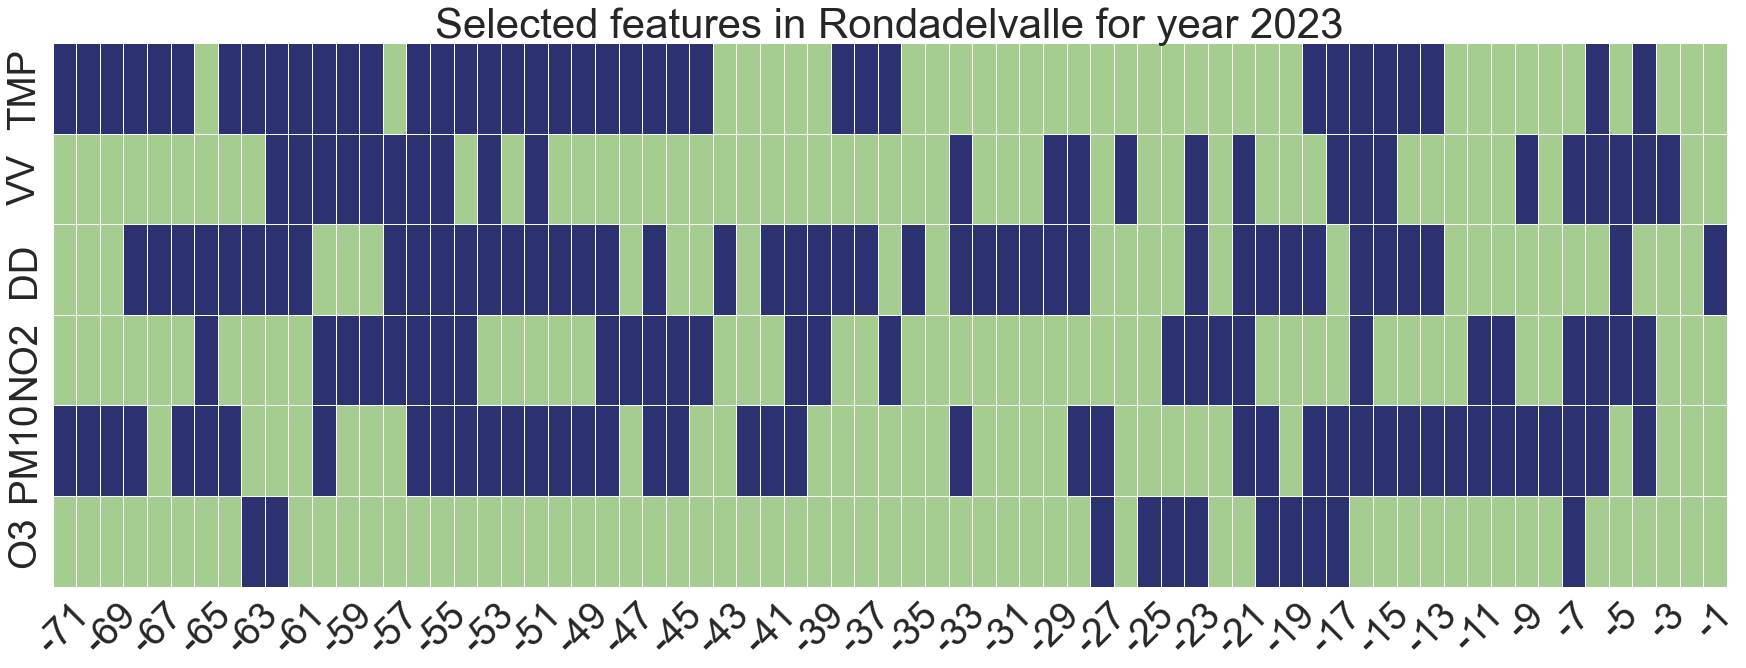

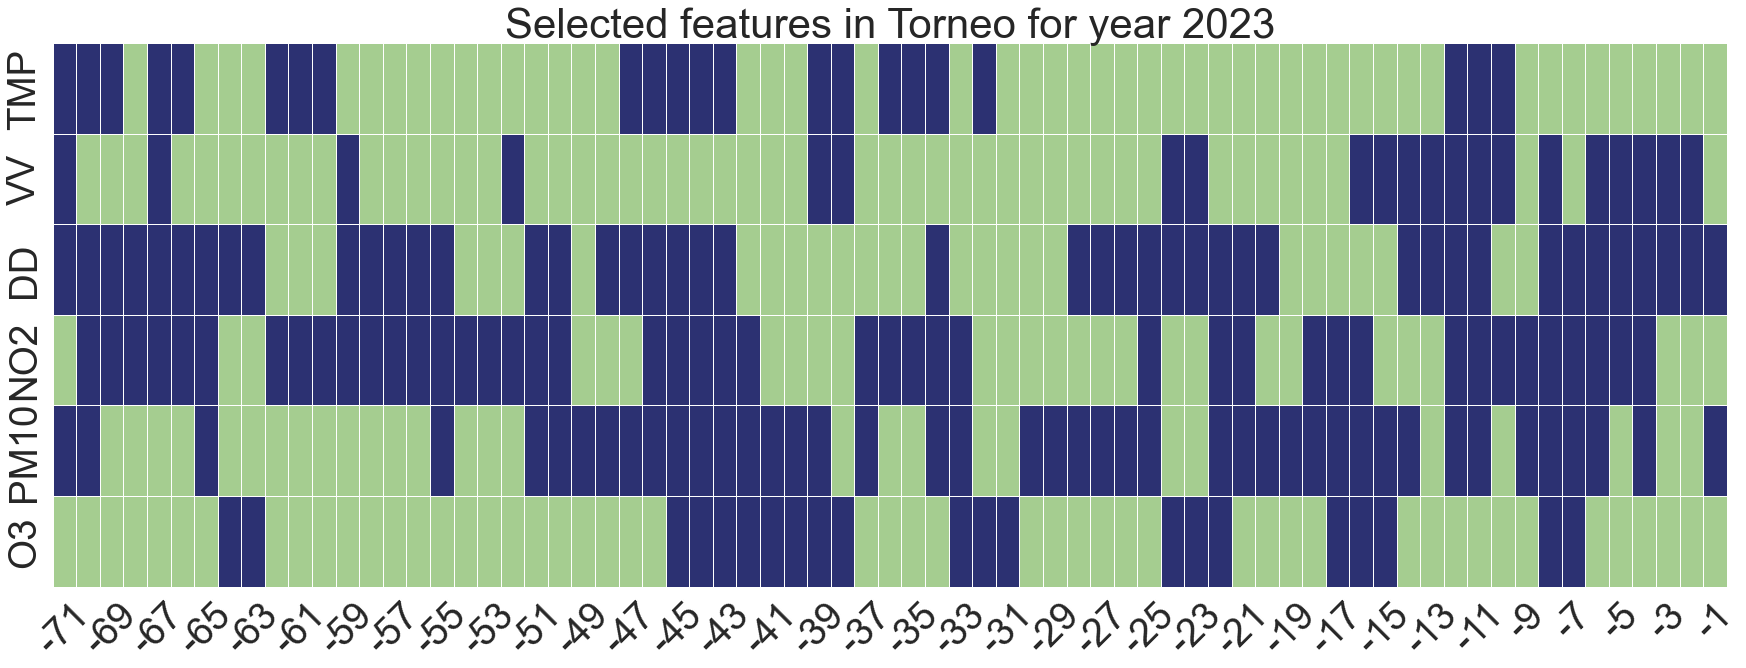

In [15]:
sns.set(font_scale=3.5)


fetures_list = ['tmp', 'vv', 'dd', 'no2', 'pm10', 'o3']
for dataset in best_models.dataset.unique():
    results_tsl_dataset = best_models[(best_models.dataset==dataset) & (best_models.model_name=='TLSTM')].sort_values('dataset_params_test_year')
    results_tsl_dataset1 = best_models[best_models['dataset_params_test_year']==2023]
    features = results_tsl_dataset.features.apply(eval).apply(np.array).values[0]
    selected_features = results_tsl_dataset.selected_features.apply(eval).apply(np.array).values[0]

    selection_masks = []
    for feat in fetures_list:
        
        feats = features[np.core.defchararray.find(features, feat)!=-1]
        if len(feats)==0:
            continue
        sfeats = selected_features[np.core.defchararray.find(selected_features, feat)!=-1]

        
        mask = np.isin(feats, sfeats).astype(np.uint)
        selection_masks.append(mask)
    
    selection_masks = np.stack(selection_masks)
    print(selection_masks.sum()/(selection_masks.shape[0]*selection_masks.shape[1]))
    fig, ax = plt.subplots(figsize=(30,10))

    ax.set_title(f'Selected features in {dataset[:-4]} for year 2023')
    cmap = sns.cm.crest_r
    feats[-2::-2] = ''
    g = sns.heatmap(selection_masks, yticklabels=list(map(lambda x: x.upper(), fetures_list)),cmap=cmap, xticklabels=list(map(lambda f: f.replace('target_o3 t', ''), feats.tolist())), cbar=False, linewidth=.5, ax=ax)
    plt.xticks(rotation=45)
    fig = g.get_figure()
    fig.savefig(f"figures/SelectionMasks/Ozone_{dataset[:-4]}.png", bbox_inches='tight') 

## Results by year

In [10]:
best_metrics = best_models.rename({'dataset_params_test_year': 'year'}, axis=1)
best_metrics = best_metrics[(best_metrics.year>2005)]
best_metrics = best_metrics[best_metrics.model_name.isin(["L1", "TFF", "TLSTM"])]
best_metrics.pivot(index = ['year'], columns=[ 'dataset','model_name'], values='root_mean_squared_error').round(1)#.to_latex()

dataset    Aljarafe0523             Asomadilla0523             Bermejales0523  \
model_name           L1   TFF TLSTM             L1   TFF TLSTM             L1   
year                                                                            
2006               16.8  17.1  16.2           17.4  17.7  17.1           18.0   
2007               15.5  16.4  15.6           16.4  16.3  16.2           17.7   
2008               16.7  17.7  16.9           16.6  16.9  16.3           18.6   
2009               16.6  16.9  16.7           16.2  15.8  15.8           18.7   
2010               16.9  16.6  16.1           16.3  15.9  15.6           18.5   
2011               15.0  16.0  14.8           15.8  15.9  16.2           17.0   
2012               16.5  16.7  16.0           15.8  15.7  15.6           17.4   
2013               14.9  14.4  14.2           14.6  14.4  14.7           17.2   
2014               15.0  15.0  14.4           15.6  15.1  14.8           16.7   
2015               17.2  16.1  16.0           14.9  14.9  14.8           16.4   
2016               15.1  15.1  14.4           14.7  14.5  14.4           16.3   
2017               15.2  15.1  14.5           14.8  15.1  15.2           17.2   
2018               14.1  14.3  13.9           15.2  14.7  14.2           17.5   
2019               13.7  13.8  14.0           15.1  14.6  14.6           16.9   
2020               13.1  13.0  12.8           13.6  13.6  13.1           16.1   
2021               12.9  12.9  13.1           14.1  13.7  14.1           16.2   
2022               13.6  13.7  13.3           13.0  15.7  12.7           15.5   
2023               15.2  15.2  14.6           13.6  13.3  13.3           14.0   

dataset                Rondadelvalle0523             Torneo0523              
model_name   TFF TLSTM                L1   TFF TLSTM         L1   TFF TLSTM  
year                                                                         
2006        18.9  18.7              20.3  20.3  19.8       13.1  13.1  12.9  
2007        18.3  17.9              19.9  19.6  19.4       13.0  13.1  13.0  
2008        19.2  18.5              20.0  19.3  19.1       13.1  13.2  13.2  
2009        18.6  18.7              18.6  18.4  18.1       13.5  13.7  14.4  
2010        18.9  18.1              20.5  19.8  19.2       14.4  14.4  14.1  
2011        17.6  17.4              18.2  17.8  17.6       13.6  13.9  13.7  
2012        17.8  17.6              16.4  15.5  15.8       14.3  14.4  14.5  
2013        17.2  16.7              17.2  16.7  16.1       13.7  13.7  13.5  
2014        16.8  16.3              17.8  16.9  16.5       13.8  14.0  13.9  
2015        16.6  16.7              18.1  17.1  16.5       14.2  14.0  14.4  
2016        16.5  16.1              17.8  16.8  16.5       14.2  13.6  13.7  
2017        17.8  17.2              19.2  18.1  17.7       14.6  14.2  14.1  
2018        18.1  17.7              18.5  17.8  16.7       14.5  14.0  14.0  
2019        17.3  16.8              17.0  16.8  16.4       14.8  14.5  14.3  
2020        15.8  15.2              15.1  14.8  14.6       13.7  13.5  13.9  
2021        15.7  15.9              16.7  16.1  15.4       14.2  14.4  14.1  
2022        14.9  14.7              16.3  15.4  15.6       14.3  14.4  14.3  
2023        13.4  14.3              16.3  15.6  15.4       14.0  14.3  14.3

## Bayesian tests

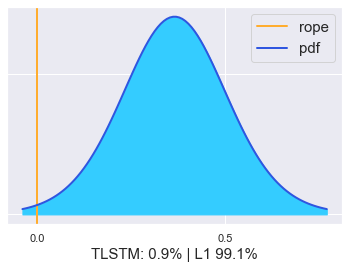

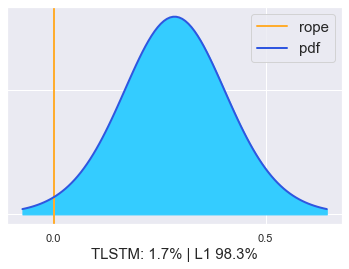

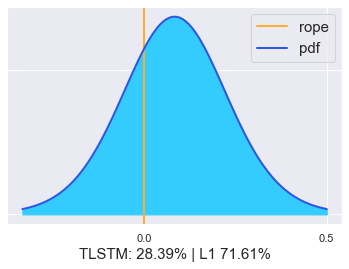

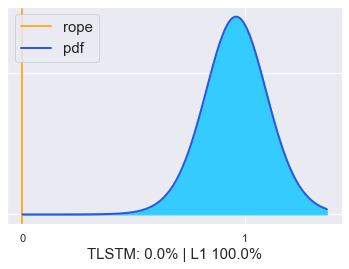

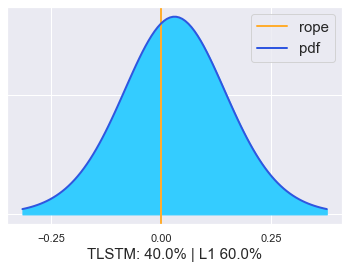

In [16]:
from baycomp import two_on_single


for dataset in best_metrics.dataset.unique():
    metrics_tsl = best_metrics[(best_metrics.dataset==dataset) & (best_metrics.model_name=='TLSTM')].root_mean_squared_error.values
    metrics_l1 = best_metrics[(best_metrics.dataset==dataset) & (best_metrics.model_name=='L1')].root_mean_squared_error.values
    probs, fig = two_on_single(metrics_tsl, metrics_l1, names=['TLSTM', 'L1'], plot=True)
    plt.xlabel(f'TLSTM: {round(probs[0]*100, 2)}% | L1 {round(probs[1]*100, 2)}%', fontsize=15)
    plt.legend(fontsize=15)
    fig.savefig(f"figures/Baytest/Baytest{dataset[:-4]}.png") 

## Best hyperparameters

In [12]:
best_hyperparameters = best_models.reset_index().groupby(['dataset', 'model_name']).head(1).reset_index()

In [14]:
pd.set_option('display.max_colwidth', 2000)
params = list(map(lambda my_dict: {k: my_dict[k] if not my_dict[k].is_integer() else int(my_dict[k]) for k in my_dict if not np.isnan(my_dict[k])},best_hyperparameters.loc[:, ['model_params_layers', 'model_params_units', 'model_params_batch_size', 'model_params_lr','model_params_dropout',  'model_params_max_depth', 'model_params_regularization','selection_params_regularization']].to_dict('records')))
best_hyperparameters['window'] = best_hyperparameters.dataset_params_seq_len #
best_hyperparameters['params'] = params

best_hyperparameters[["dataset", "model_name", "window", "params"]].set_index(['dataset', 'model_name', 'window']).to_latex('tab.tex')#[best_hyperparameters.model_name=="TSL+LSTM"].set_index(['dataset']).to_dict('index')#.to_latex('tab.tex')

C:\Users\manjj\AppData\Local\Temp\ipykernel_10936\611890180.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_hyperparameters[["dataset", "model_name", "window", "params"]].set_index(['dataset', 'model_name', 'window']).to_latex('tab.tex')#[best_hyperparameters.model_name=="TSL+LSTM"].set_index(['dataset']).to_dict('index')#.to_latex('tab.tex')
